In [106]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # KNN

samsung = pd.read_csv('krx/stocks/삼성전자.csv')
samsung.head()

,Date,Open,High,Low,Close,Volume,Change
0,2000-04-27,5520,5700,5400,5400,1082253,NaN
1,2000-04-28,5500,6100,5460,6000,1510624,0.111111
2,2000-05-02,6200,6530,6120,6280,1446713,0.046667
3,2000-05-03,6240,6260,6090,6180,531786,-0.015924
4,2000-05-04,6220,6360,6140,6180,522021,0.000000


In [110]:
samsung.shape

(6000, 7)

In [17]:
samsung.isnull().sum().sum()

0

In [112]:
samsung.dropna(inplace=True)

In [114]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 1 to 5999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5999 non-null   object 
 1   Open    5999 non-null   int64  
 2   High    5999 non-null   int64  
 3   Low     5999 non-null   int64  
 4   Close   5999 non-null   int64  
 5   Volume  5999 non-null   int64  
 6   Change  5999 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 374.9+ KB


In [22]:
samsung['Date']=pd.to_datetime(samsung['Date'])

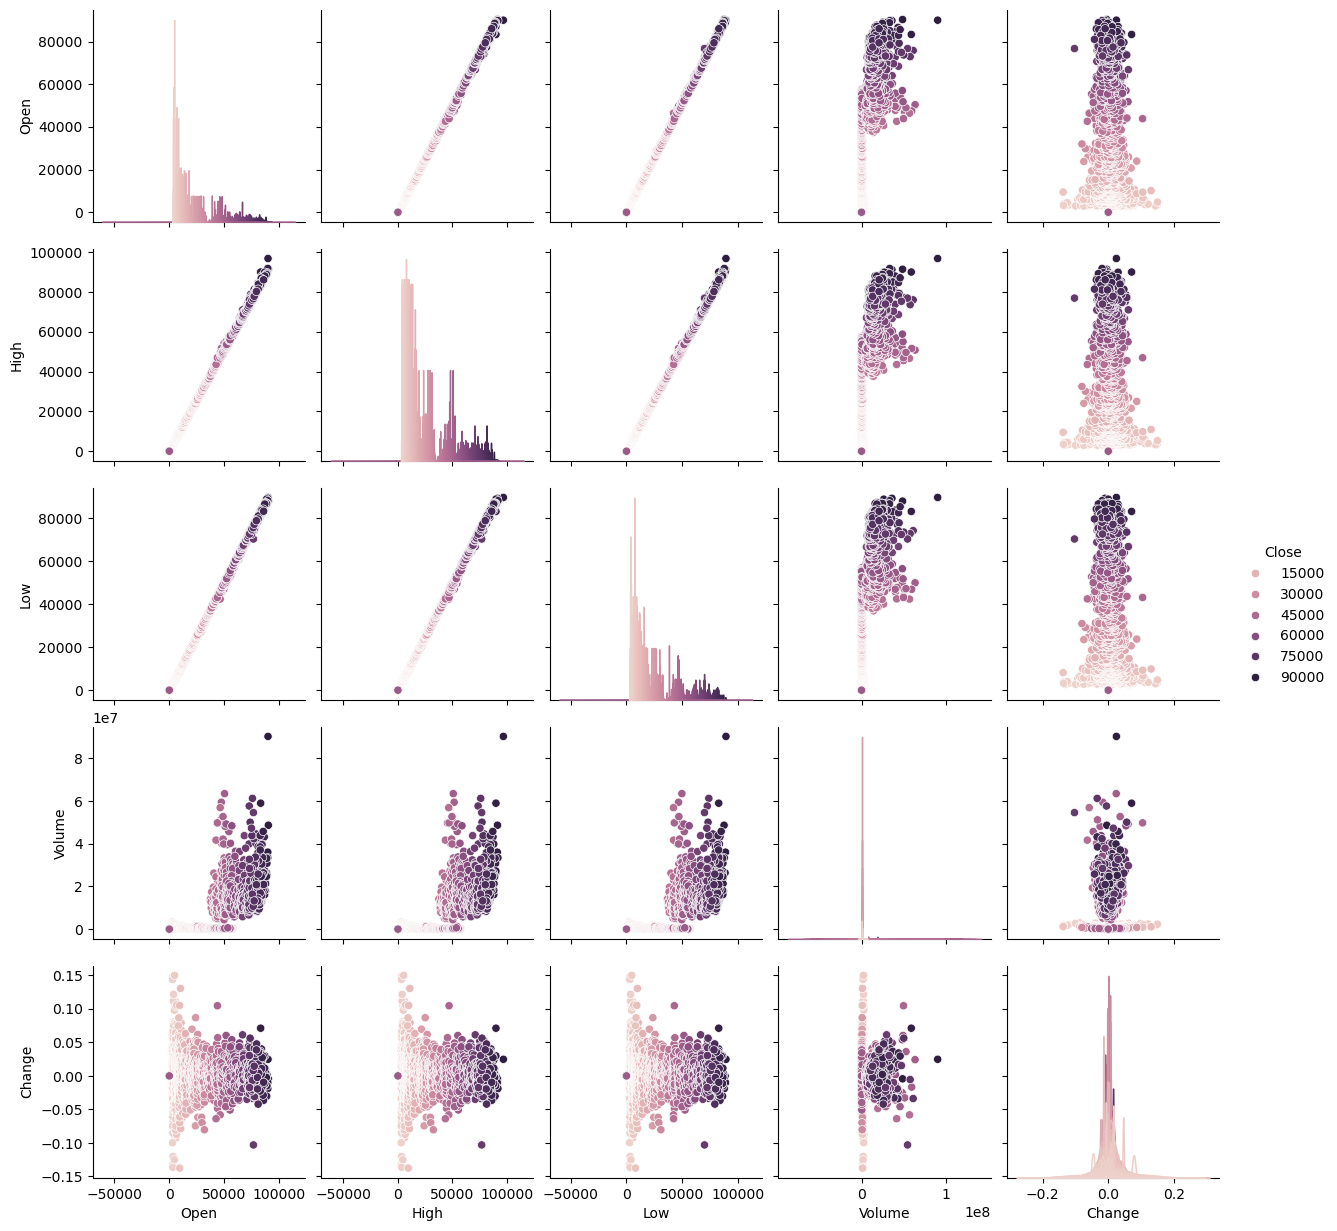

In [29]:
sns.pairplot(samsung,hue='Close')

In [33]:
samsung.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

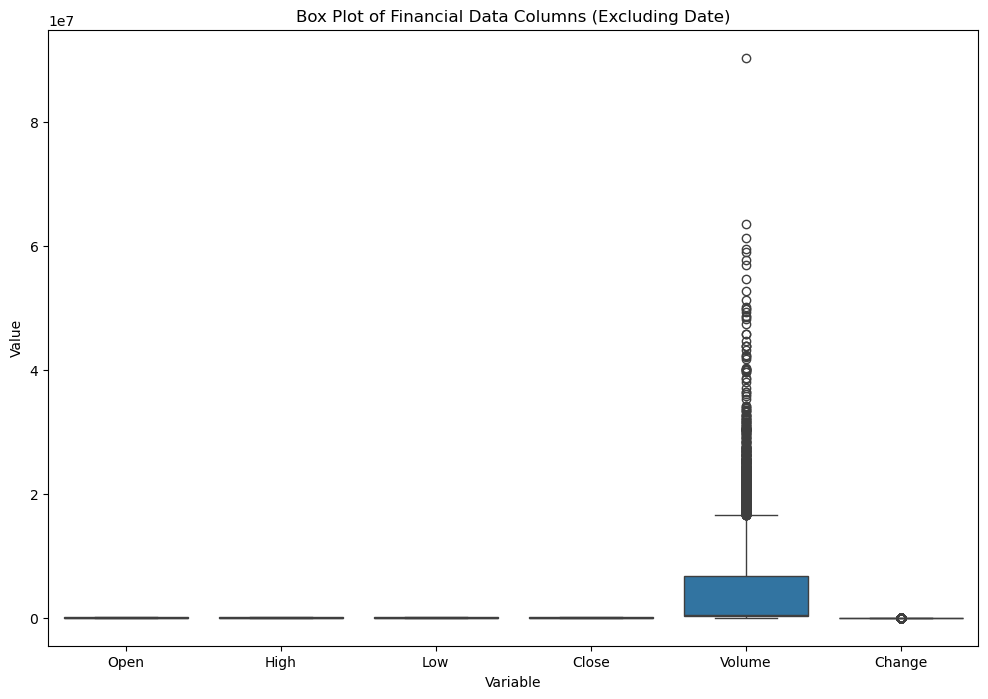

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'Date' 컬럼을 제외한 나머지 컬럼 선택
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']

# 선택한 컬럼에 대해 박스플롯 그리기
plt.figure(figsize=(12, 8))

# DataFrame을 melt해서 하나의 컬럼으로 변환 (sns.boxplot 사용을 위해)
df_melted = samsung[columns_to_plot].melt(var_name='Variable', value_name='Value')

# 박스플롯
sns.boxplot(x='Variable', y='Value', data=df_melted)

# 그래프 제목과 라벨 설정
plt.title('Box Plot of Financial Data Columns (Excluding Date)')
plt.xlabel('Variable')
plt.ylabel('Value')

# 그래프 표시
plt.show()

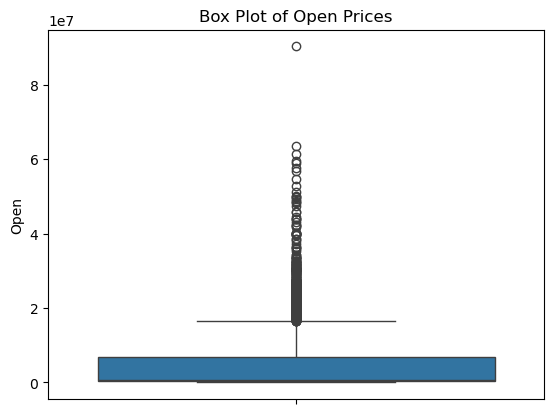

In [42]:
sns.boxplot(y=samsung['Volume'])

# 그래프 제목과 라벨 설정
plt.title('Box Plot of Open Prices')
plt.ylabel('Open')

# 그래프 표시
plt.show() 

In [44]:
samsung['Volume'].value_counts()

Volume
0           3
223207      2
281014      2
223655      2
437123      2
           ..
362537      1
286740      1
419364      1
397396      1
20804476    1
Name: count, Length: 5987, dtype: int64

### KNN 모델

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 삼성전자 데이터 불러오기 및 KNN 모델 학습
samsung = pd.read_csv('krx/stocks/삼성전자.csv')
samsung['Date'] = pd.to_datetime(samsung['Date'])  # 날짜 형식으로 변환
samsung.set_index('Date', inplace=True)  # 날짜를 인덱스로 설정

# Feature와 Target 변수 설정 (예시: 'Open', 'High', 'Low', 'Volume'을 Feature로 사용하고 'Change'를 Target으로 사용)
X = samsung[['Open', 'High', 'Low', 'Volume']]
y = samsung['Change'] > 0  # Change가 0보다 큰 경우 True, 그렇지 않으면 False

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = knn.predict(X_test)
print("KNN 모델 정확도:", accuracy_score(y_test, y_pred))
print(knn.score(X_test,y_test))

KNN 모델 정확도: 0.5205555555555555
0.5205555555555555


In [118]:
samsung.head()

,Date,Open,High,Low,Close,Volume,Change
1,2000-04-28,5500,6100,5460,6000,1510624,0.111111
2,2000-05-02,6200,6530,6120,6280,1446713,0.046667
3,2000-05-03,6240,6260,6090,6180,531786,-0.015924
4,2000-05-04,6220,6360,6140,6180,522021,0.000000
5,2000-05-08,6400,6700,6300,6560,1053944,0.061489


In [132]:
# 예측
a = [79400,80200,78700,22061478,3000]

knn.predict([a])

ValueError: X has 5 features, but KNeighborsClassifier is expecting 4 features as input.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 및 준비
samsung = pd.read_csv('krx/stocks/삼성전자.csv')
samsung['Date'] = pd.to_datetime(samsung['Date'])
samsung.set_index('Date', inplace=True)

# 결측값 제거
samsung.dropna(inplace=True)

# Feature 및 Target 생성
def create_features_and_target(df, n_lag=5):
    X, y = [], []
    for i in range(n_lag, len(df)):
        features = df.iloc[i-n_lag:i]['Close'].values
        X.append(features)
        y.append(df.iloc[i]['Close'])
    return np.array(X), np.array(y)

# Feature와 Target 변수 설정
n_lag = 5
X, y = create_features_and_target(samsung, n_lag)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print("KNN 회귀 모델 MSE:", mean_squared_error(y_test, y_pred))

# 예측하려는 데이터 준비 (날짜를 포함하지 않음)
a = [79400, 80200, 78700, 22061478, 3000]

# 예측
try:
    prediction = knn.predict([a])
    print("예측 결과:", prediction)
except Exception as e:
    print("예측 오류:", e)


KNN 회귀 모델 MSE: 533160.4113396332
예측 결과: [87000.]


### 코사인 유사도

In [48]:
import warnings
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

1 001 2001-06-11 00:00:00 2003-06-10 00:00:00
1 001 2003-06-11 00:00:00 2005-06-10 00:00:00
1 001 2005-06-11 00:00:00 2007-06-10 00:00:00
1 001 2007-06-11 00:00:00 2009-06-10 00:00:00
1 001 2009-06-11 00:00:00 2011-06-10 00:00:00
1 001 2011-06-11 00:00:00 2013-06-10 00:00:00
1 001 2013-06-11 00:00:00 2015-06-10 00:00:00
1 001 2015-06-11 00:00:00 2017-06-10 00:00:00
1 001 2017-06-11 00:00:00 2019-06-10 00:00:00
1 001 2019-06-11 00:00:00 2021-06-10 00:00:00
1 001 2021-06-11 00:00:00 2023-06-10 00:00:00
1 001 2023-06-11 00:00:00 2025-06-10 00:00:00


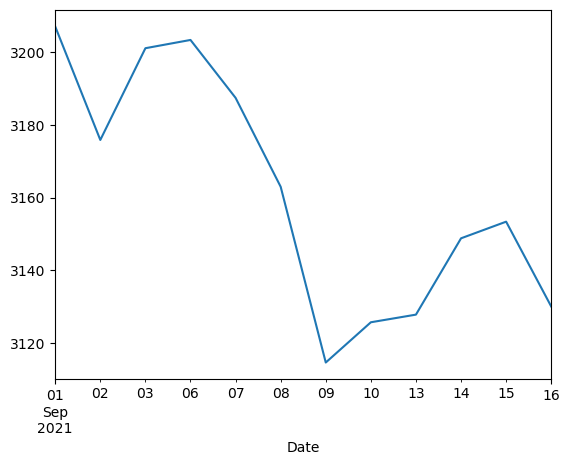

In [78]:
# finance datareader로부터 데이터 불러오기
data = fdr.DataReader('KS11')
# 종가만 추출
close = data['Close']

# 비교 기준 구간
start_date = '2021-09-01'
end_date = '2021-09-16'
# 기준 구간 시계열 차트
close[start_date:end_date].plot();

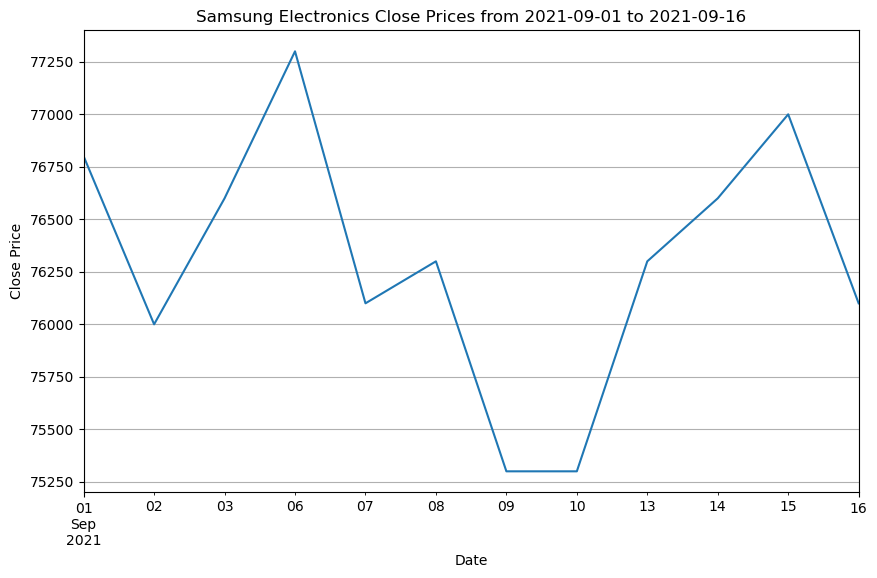

In [85]:
# 종가만 추출
close = samsung['Close']

# 비교 기준 구간
start_date = '2021-09-01'
end_date = '2021-09-16'

# 기준 구간 시계열 차트
plt.figure(figsize=(10, 6))
close[start_date:end_date].plot()
plt.title(f'Samsung Electronics Close Prices from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


### knn 모델로 시계열 최근 5일 주가 예측

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Feature 및 Target 생성
def create_features_and_target(df, n_lag=5):
    X, y = [], []
    for i in range(n_lag, len(df)):
        X.append(df.iloc[i-n_lag:i]['Close'])
        y.append(df.iloc[i]['Close'])
    return pd.DataFrame(X), pd.Series(y)

# Feature와 Target 변수 설정
n_lag = 5  # 최근 5일의 데이터를 사용하여 예측
X, y = create_features_and_target(samsung, n_lag)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print("KNN 회귀 모델 MSE:", mean_squared_error(y_test, y_pred))

# 예측값 시계열 데이터와 실제값 시계열 데이터 준비
predicted = knn.predict(X.values[-len(y_test):])
actual = y.values[-len(y_test):]

# 시계열 차트 시각화
plt.figure(figsize=(12, 6))
plt.plot(samsung.index[-len(y_test):], actual, label='Actual Close Price', color='blue')
plt.plot(samsung.index[-len(y_test):], predicted, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Samsung Electronics Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [136]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-04-28,5500,6100,5460,6000,1510624,0.111111
2000-05-02,6200,6530,6120,6280,1446713,0.046667
2000-05-03,6240,6260,6090,6180,531786,-0.015924
2000-05-04,6220,6360,6140,6180,522021,0.000000
2000-05-08,6400,6700,6300,6560,1053944,0.061489


#### 재무지표 파일 

In [ ]:
# ticker: 종목 코드 또는 티커 심볼. 
# 주식 시장에서 해당 주식을 고유하게 식별하는 코드입니다. 예를 들어, 삼성전자의 티커 심볼은 005930입니다.

# symbol: 회사 심볼 또는 종목명. 회사의 주식을 나타내는 심볼이나 이름입니다
#. 예를 들어, AJ네트웍스 또는 삼성전자와 같은 기업명을 나타냅니다.

# per: 주가수익비율 (Price-to-Earnings Ratio, PER). 
# 회사의 주가가 주당 순이익(EPS)의 몇 배인지 나타내는 비율입니다. 
# PER는 주식이 저평가되었는지 과대평가되었는지를 평가하는 데 도움이 됩니다. 낮은 PER은 저평가된 주식을 나타낼 수 있습니다.

# 계산 방법: PER = 주가 / 주당 순이익 (EPS)
# pbr: 주가순자산비율 (Price-to-Book Ratio, PBR). 
# 회사의 주가가 장부가치(자산에서 부채를 뺀 순자산)의 몇 배인지 나타내는 비율입니다. 
# PBR은 주식이 자산 대비 얼마나 비싼지 평가하는 데 사용됩니다. 낮은 PBR은 자산 대비 저평가된 주식을 나타낼 수 있습니다.

# 계산 방법: PBR = 주가 / 주당 순자산 (Book Value per Share)

# dividend_yield: 배당수익률 (Dividend Yield). 주식의 배당금이 주가에 비해 얼마나 되는지를 나타내는 비율입니다.
# 배당금의 크기와 주가에 대한 비율을 통해 주식의 수익성을 평가할 수 있습니다. 높은 배당수익률은 주주에게 더 많은 배당금을 지급하는 주식을 나타냅니다.

# 계산 방법: Dividend Yield = (연간 배당금 / 주가) × 100

In [157]:
df = pd.read_csv('20240820_stock_data_df.csv')

# 'Unnamed: 0' 컬럼을 제거합니다.
df= df.drop(columns=['Unnamed: 0'])

df.head()

,ticker,symbol,per,pbr,dividend_yield
0,095570,AJ네트웍스,12.06,0.48,6.00
1,006840,AK홀딩스,8.68,0.28,1.56
2,027410,BGF,4.45,0.20,3.43
3,282330,BGF리테일,9.78,1.82,3.78
4,138930,BNK금융지주,5.04,0.30,5.17


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          958 non-null    object 
 1   symbol          958 non-null    object 
 2   per             677 non-null    float64
 3   pbr             927 non-null    float64
 4   dividend_yield  659 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.6+ KB


In [164]:
df.isnull().sum()

ticker              0
symbol              0
per               281
pbr                31
dividend_yield    299
dtype: int64

In [151]:
df.columns

Index(['Unnamed: 0', 'ticker', 'symbol', 'per', 'pbr', 'dividend_yield'], dtype='object')

In [160]:
krx= pd.read_excel('krx/krx.xlsx')
krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,NaN,80200,1,3000,3.89,79400,80200,78700,22061478,1749786266068,478776560510000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,NaN,199700,1,13000,6.96,196000,200000,194700,6959688,1376475031084,145382072290500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,336500,2,-500,-0.15,343500,344500,335500,151534,51457016000,78741000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,931000,2,-1000,-0.11,940000,943000,925000,96605,89964693000,66262994000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,NaN,255000,1,14000,5.81,248000,256500,246500,1113073,281005390375,53401128705000,209416191,STK


In [179]:
import pandas as pd

# 두 데이터프레임 읽어오기
stock_data_df = pd.read_csv('20240820_stock_data_df.csv')
financial_data_df = pd.read_excel('krx/krx.xlsx')

# 컬럼명 변경
# stock_data_df의 'symbol'을 'Name'으로 변경
stock_data_df.rename(columns={'symbol': 'Name'}, inplace=True)

# 'Code'와 'Name' 컬럼을 기준으로 데이터프레임 조인하기
# financial_data_df의 'Name'을 'Name'으로 사용
merged_df = pd.merge(stock_data_df, financial_data_df, left_on='Name', right_on='Name', how='inner')

# 결과를 CSV 파일로 저장하기
merged_df.to_csv('merged_stock_data.csv', index=False)

# 결과 확인
merged_df.head()


,Unnamed: 0,ticker,Name,per,pbr,dividend_yield,Code,ISU_CD,Market,Dept,...,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,0,095570,AJ네트웍스,12.06,0.48,6.00,095570,KR7095570008,KOSPI,NaN,...,60,1.38,4400,4420,4360,32363,142422060,199564667190,45252759,STK
1,1,006840,AK홀딩스,8.68,0.28,1.56,006840,KR7006840003,KOSPI,NaN,...,-270,-2.03,13310,13380,13000,2879,37878300,172218293000,13247561,STK
2,2,027410,BGF,4.45,0.20,3.43,027410,KR7027410000,KOSPI,NaN,...,-60,-1.69,3570,3580,3480,102795,360117820,334051600590,95716791,STK
3,3,282330,BGF리테일,9.78,1.82,3.78,282330,KR7282330000,KOSPI,NaN,...,-3000,-2.63,115000,115200,110800,44513,5008434700,1918513566000,17283906,STK
4,4,138930,BNK금융지주,5.04,0.30,5.17,138930,KR7138930003,KOSPI,NaN,...,-270,-2.76,9850,9870,9470,1174122,11326520500,3059840161000,322088438,STK


In [188]:
merge = pd.read_csv('merged_stock_data.csv')
# 'Unnamed: 0' 컬럼을 제거합니다.
merge= merge.drop(columns=['Unnamed: 0'])
merge= merge.drop(columns=['ticker'])

# 결과를 새로운 CSV 파일로 저장
merge.to_csv('merged2_stock.csv', index=False)

merge.head()

,Name,per,pbr,dividend_yield,Code,ISU_CD,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,AJ네트웍스,12.06,0.48,6.00,095570,KR7095570008,KOSPI,NaN,4410,1,60,1.38,4400,4420,4360,32363,142422060,199564667190,45252759,STK
1,AK홀딩스,8.68,0.28,1.56,006840,KR7006840003,KOSPI,NaN,13000,2,-270,-2.03,13310,13380,13000,2879,37878300,172218293000,13247561,STK
2,BGF,4.45,0.20,3.43,027410,KR7027410000,KOSPI,NaN,3490,2,-60,-1.69,3570,3580,3480,102795,360117820,334051600590,95716791,STK
3,BGF리테일,9.78,1.82,3.78,282330,KR7282330000,KOSPI,NaN,111000,2,-3000,-2.63,115000,115200,110800,44513,5008434700,1918513566000,17283906,STK
4,BNK금융지주,5.04,0.30,5.17,138930,KR7138930003,KOSPI,NaN,9500,2,-270,-2.76,9850,9870,9470,1174122,11326520500,3059840161000,322088438,STK


In [190]:
merge.isnull().sum()

Name                0
per               280
pbr                31
dividend_yield    298
Code                0
ISU_CD              0
Market              0
Dept              956
Close               0
ChangeCode          0
Changes             0
ChagesRatio         0
Open                0
High                0
Low                 0
Volume              0
Amount              0
Marcap              0
Stocks              0
MarketId            0
dtype: int64